# Feature Selection


Feature selection is the process of determining what features to include in your model. Why do we need feature selection?


*   To prevent overfitting - models with more features are more prone to overfitting
*   To simplify our model - simpler models are easier to interpret and debug
*   To reduce computation time - models run faster with less features


There are several ways we can perform feature selection
1. Filter methods
2. Wrapper methods such as forward selection (there are known issues with some of these methods)
3. Regularization methods (these are discussed in more detail in another lecture)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Read in Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Read in data
url = "http://ddc-datascience.s3-website-us-west-1.amazonaws.com/CarPrice_Assignment.csv"
cars = pd.read_csv( url )
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
cars.shape

(205, 26)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
cars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


## Data Cleaning

In [8]:
# Drop car_ID column
cars.drop('car_ID', inplace = True, axis = 1)

In [9]:
# Look at CarName column
cars['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [14]:
# Keep just the name of the car manufacturer
car_split = lambda x: x.split(" ")[0]

def car_split(x):
  return x.split(" ")[0]

cars['carCompany'] = cars['CarName'].apply(lambda x: x.split(" ")[0])

# pd.Series([ x.split(" ")[0] for x in cars['CarName'] ][:10])

# cars['CarName'].apply(lambda x: x.split(" ")[0])


0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
dtype: object

In [11]:
cars['carCompany'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: carCompany, dtype: int64

In [15]:
# # Fix spelling
# cars['carCompany'] = cars['carCompany'].str.replace('vw', 'volkswagen')
# cars['carCompany'] = cars['carCompany'].str.replace('vokswagen', 'volkswagen')
# cars['carCompany'] = cars['carCompany'].str.replace('porcshce', 'porsche')
# cars['carCompany'] = cars['carCompany'].str.replace('maxda', 'mazda')
# cars['carCompany'] = cars['carCompany'].str.replace('toyouta', 'toyota')
# cars['carCompany'] = cars['carCompany'].str.replace('Nissan', 'nissan')


In [18]:
# create mapping between incorrect and correct spelling
spelling_dict={
  'alfa-romero': 'alfa-romeo',
  'maxda': 'mazda',
  'Nissan': 'nissan',
  'porcshce': 'porsche',
  'toyouta': 'toyota',
  'vw': 'volkswagen',
  'vokswagen': 'volkswagen',
}

In [19]:
# Fix spelling
for k, v in spelling_dict.items():
  cars['carCompany'] = cars['carCompany'].str.replace( k, v )

cars['carCompany'].value_counts()


toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
chevrolet      3
alfa-romeo     3
renault        2
mercury        1
Name: carCompany, dtype: int64

In [20]:
# Drop carname column
cars.drop('CarName', axis = 1, inplace = True)

In [21]:
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [25]:
cars['doornumber'].value_counts(), cars['cylindernumber'].value_counts()

(four    115
 two      90
 Name: doornumber, dtype: int64,
 four      159
 six        24
 five       11
 eight       5
 two         4
 three       1
 twelve      1
 Name: cylindernumber, dtype: int64)

In [26]:
# Change doornumber and cylindernumber to numeric form
cars['doornumber'] = cars['doornumber'].replace({
    'four': 4,
    'two':  2,
    })
cars['cylindernumber'] = cars['cylindernumber'].replace({
    'two':    2,
    'three':  3,
    'four':   4,
    'five':   5,
    'six':    6,
    'eight':  8,
    'twelve': 12,
    })
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [28]:
cars.dtypes.sort_values()

symboling             int64
highwaympg            int64
citympg               int64
doornumber            int64
peakrpm               int64
horsepower            int64
enginesize            int64
cylindernumber        int64
curbweight            int64
price               float64
carlength           float64
carwidth            float64
stroke              float64
wheelbase           float64
compressionratio    float64
carheight           float64
boreratio           float64
enginetype           object
enginelocation       object
drivewheel           object
carbody              object
aspiration           object
fueltype             object
fuelsystem           object
carCompany           object
dtype: object

In [29]:
# Pull out object data types
cars_categorical = cars.select_dtypes(include = 'object')
cars_categorical.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,carCompany
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romeo
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romeo
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romeo
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [30]:
# One hot encode these categories
cars_encoded = pd.get_dummies(cars_categorical)
cars_encoded.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,...,carCompany_nissan,carCompany_peugeot,carCompany_plymouth,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_volkswagen,carCompany_volvo
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
cars_encoded.shape

(205, 51)

In [32]:
cars_categorical.shape

(205, 8)

In [34]:
# Combine encoded dataframe to data frame with just numeric values
cars_numerical = cars.select_dtypes(include = ['int64', 'float64'])
cars_numerical.shape

(205, 17)

In [35]:
cars_combined = pd.concat([cars_numerical, cars_encoded], axis = 1)
cars_combined.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,carCompany_nissan,carCompany_peugeot,carCompany_plymouth,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_volkswagen,carCompany_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [36]:
cars_combined.shape

(205, 68)

## Processing

First, we will fit a model with all predictors.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [44]:
# split into Target and Features
X = cars_combined.drop('price', axis = 1)
y = cars_combined['price']

In [45]:
# Perform CV
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"CV RMSE: {results.mean().round(2)}")
print(f"Number of Predictors: {len(X.columns)}")

CV RMSE: 2628.64
Number of Predictors: 67


## Feature Selection

## Filter Methods
With filter methods, we will calculate a statistical metric for each column. Based on that metric, it will be decided whether that feature will be kept or removed from our predictive model. *Note*: the choice of statistical metric depends on the data type of the feature.

**Pros**: Easy to implement

**Cons**: Does not account for interactions between features

Image from [Toward Data Science:](https://towardsdatascience.com/learn-how-to-do-feature-selection-the-right-way-61bca8557bef)

![An image](https://miro.medium.com/max/1400/1*tzfWABEHK9-4SOaSl1mdRA.png)


### Numerical Predictors & Numerical Response - Pearson Correlation Coefficient

In [46]:
# Look at numerical predictors
cars_numerical.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [47]:
# Sort correlations w/ price
cars_numerical.corr()['price'].abs().sort_values(ascending = False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
Name: price, dtype: float64

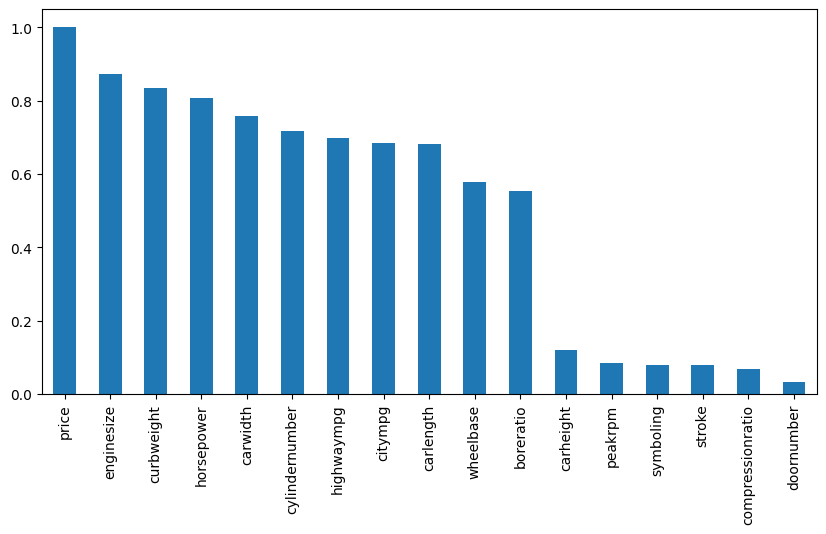

In [48]:
# Plot result
cars_numerical.corr()['price'].abs().sort_values(ascending = False).plot(kind = 'bar', figsize = (10,5)) ;

WARNING: The correlation coefficient only measures the strength of the linear relationship between two variables. If the relationship is nonlinear, it may not be reflected in the correlation coefficient.

Example from [Toward Data Science:](https://towardsdatascience.com/learn-how-to-do-feature-selection-the-right-way-61bca8557bef)
![An image](https://miro.medium.com/max/1400/1*cY24YPkTGmuzaSaUmdTbmw.png)

In [49]:
# Fit linear regression model w/ just continuous predictors highly correlated with response
corrs = cars_numerical.corr()['price'].abs().sort_values(ascending = False)
keep = corrs[(corrs>.2) & (corrs <1)]
keep

enginesize        0.874145
curbweight        0.835305
horsepower        0.808139
carwidth          0.759325
cylindernumber    0.718305
highwaympg        0.697599
citympg           0.685751
carlength         0.682920
wheelbase         0.577816
boreratio         0.553173
Name: price, dtype: float64

In [50]:
X_corr = X[keep.index]
X_corr.head()

,enginesize,curbweight,horsepower,carwidth,cylindernumber,highwaympg,citympg,carlength,wheelbase,boreratio
0,130,2548,111,64.1,4,27,21,168.8,88.6,3.47
1,130,2548,111,64.1,4,27,21,168.8,88.6,3.47
2,152,2823,154,65.5,6,26,19,171.2,94.5,2.68
3,109,2337,102,66.2,4,30,24,176.6,99.8,3.19
4,136,2824,115,66.4,5,22,18,176.6,99.4,3.19


In [51]:
# Combine correlated numerical predictors with all encoded categorical predictors
X = pd.concat([X_corr, cars_encoded], axis = 1)
X.head()

,enginesize,curbweight,horsepower,carwidth,cylindernumber,highwaympg,citympg,carlength,wheelbase,boreratio,...,carCompany_nissan,carCompany_peugeot,carCompany_plymouth,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_volkswagen,carCompany_volvo
0,130,2548,111,64.1,4,27,21,168.8,88.6,3.47,...,0,0,0,0,0,0,0,0,0,0
1,130,2548,111,64.1,4,27,21,168.8,88.6,3.47,...,0,0,0,0,0,0,0,0,0,0
2,152,2823,154,65.5,6,26,19,171.2,94.5,2.68,...,0,0,0,0,0,0,0,0,0,0
3,109,2337,102,66.2,4,30,24,176.6,99.8,3.19,...,0,0,0,0,0,0,0,0,0,0
4,136,2824,115,66.4,5,22,18,176.6,99.4,3.19,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X.shape

(205, 61)

In [52]:
# Perform CV
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"CV RMSE: {results.mean().round(2)}")
print(f"Number of Predictors: {len(X.columns)}")

CV RMSE: 2475.74
Number of Predictors: 61


### ANOVA - Categorical Predictors & Numerical Response
ANOVA works by testing if the means of different categories are statistically different. For example, it would test to see if the mean price for BMWs is statistically different from the mean price of Buicks.

It is based on the following two hypotheses
H0: Means of all groups are equal. (null hypothesis)
H1: At least one mean of the groups are different.

ANOVA calculates an F-Test for statistical signficance. The larger the value of the F-test, the more likely we are to reject the null hypothesis.

<Axes: >

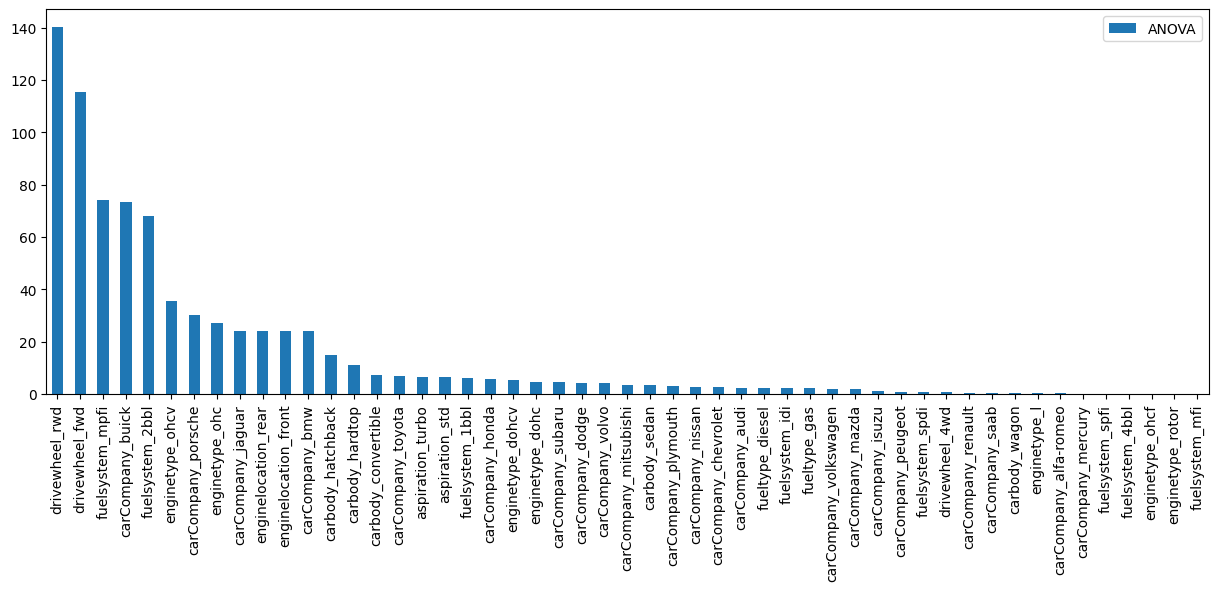

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fvalue_selector = SelectKBest(f_regression, k='all')  #select features best ANOVA F-Values
fvalue_selector.fit_transform(cars_encoded, y)

# Plot results
results = pd.DataFrame({'ANOVA': fvalue_selector.scores_}, index = cars_encoded.columns)
results.sort_values(by = 'ANOVA', ascending = False).plot(kind = 'bar', figsize = (15,5))

In [76]:
# Just keep the results with F-values greater than 20
anova = results.sort_values(by = 'ANOVA', ascending = False)
keep = anova['ANOVA'][anova['ANOVA'] > 20]
keep

drivewheel_rwd          140.059236
drivewheel_fwd          115.353549
fuelsystem_mpfi          74.082624
carCompany_buick         73.311482
fuelsystem_2bbl          68.164246
enginetype_ohcv          35.539883
carCompany_porsche       30.145299
enginetype_ohc           27.295010
carCompany_jaguar        24.151792
enginelocation_rear      23.969740
enginelocation_front     23.969740
carCompany_bmw           23.929746
Name: ANOVA, dtype: float64

In [77]:
X_anova = X[keep.index]

In [78]:
X_anova

,drivewheel_rwd,drivewheel_fwd,fuelsystem_mpfi,carCompany_buick,fuelsystem_2bbl,enginetype_ohcv,carCompany_porsche,enginetype_ohc,carCompany_jaguar,enginelocation_rear,enginelocation_front,carCompany_bmw
0,1,0,1,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,1,0,0,0,0,1,0
3,0,1,1,0,0,0,0,1,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,1,0,0,0,0,1,0,0,1,0
201,1,0,1,0,0,0,0,1,0,0,1,0
202,1,0,1,0,0,1,0,0,0,0,1,0
203,1,0,0,0,0,0,0,1,0,0,1,0


In [79]:
X2 = pd.concat([X_anova, X_corr], axis = 1)
X2.head()

,drivewheel_rwd,drivewheel_fwd,fuelsystem_mpfi,carCompany_buick,fuelsystem_2bbl,enginetype_ohcv,carCompany_porsche,enginetype_ohc,carCompany_jaguar,enginelocation_rear,...,enginesize,curbweight,horsepower,carwidth,cylindernumber,highwaympg,citympg,carlength,wheelbase,boreratio
0,1,0,1,0,0,0,0,0,0,0,...,130,2548,111,64.1,4,27,21,168.8,88.6,3.47
1,1,0,1,0,0,0,0,0,0,0,...,130,2548,111,64.1,4,27,21,168.8,88.6,3.47
2,1,0,1,0,0,1,0,0,0,0,...,152,2823,154,65.5,6,26,19,171.2,94.5,2.68
3,0,1,1,0,0,0,0,1,0,0,...,109,2337,102,66.2,4,30,24,176.6,99.8,3.19
4,0,0,1,0,0,0,0,1,0,0,...,136,2824,115,66.4,5,22,18,176.6,99.4,3.19


In [80]:
( X_corr.shape, X_anova.shape, X.shape, X2.shape)

((205, 10), (205, 12), (205, 61), (205, 22))

In [81]:
# Perform CV
n = 500
rmse_results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rmse_results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"CV RMSE: {rmse_results.mean().round(2)}")
print(f"Number of Predictors: {len(X2.columns)}")

CV RMSE: 2520.93
Number of Predictors: 22


## Regularization

In [82]:
from sklearn.linear_model import Lasso

This data set is the cleaned without the feature selection from correlation.

In [83]:
# %%capture --no-stdout
X_lasso = cars_combined.drop('price', axis = 1)
y_lasso = cars_combined['price']

# Specify values of alpha we want to try
alph = [1e-3, 1e-2, 1e-1, 1, 2, 3, 5, 7, 10, 20]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=10000); # Looping through alpha

  # Calculate CV RMSE
  n = 200
  results = np.zeros(n)
  for idx in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.25)
    my_fit_lasso.fit(X_train, y_train)
    y_pred = my_fit_lasso.predict(X_test)
    results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))

  results_alpha.append(results.mean())

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})


    Alpha         RMSE
0   0.001  2816.263678
1   0.010  2685.644395
2   0.100  2678.385608
3   1.000  2667.941759
4   2.000  2512.643769
5   3.000  2496.577672
6   5.000  2426.701741
7   7.000  2421.504235
8  10.000  2345.779556
9  20.000  2391.167339


In [84]:
results_df.sort_values( by = 'RMSE' )

,Alpha,RMSE
8,10.000,2345.779556
9,20.000,2391.167339
7,7.000,2421.504235
6,5.000,2426.701741
5,3.000,2496.577672
4,2.000,2512.643769
3,1.000,2667.941759
2,0.100,2678.385608
1,0.010,2685.644395
0,0.001,2816.263678


In [85]:
# %%capture --no-stdout
# Perform CV
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.25)
  model = Lasso(alpha = 10, tol = .01, max_iter=10000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"CV RMSE: {results.mean().round(2)}")
print(f"Number of Predictors: {sum(model.coef_ >0)}")

CV RMSE: 2357.25
Number of Predictors: 23


In [86]:
X_lasso.shape

(205, 67)

In [87]:
len(X_lasso.columns)

67

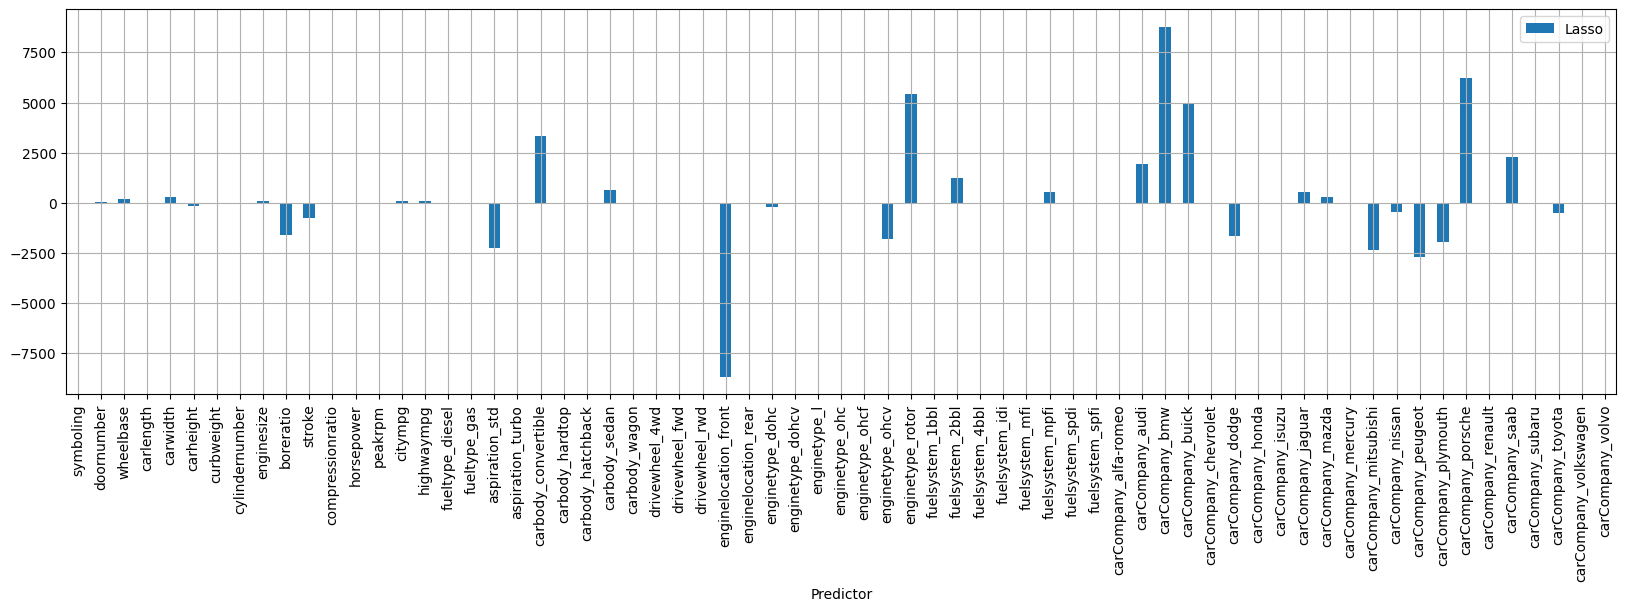

In [88]:
# Plot model coefficients
model_results = pd.DataFrame()
model_results['Predictor'] = X_lasso.columns
model_results['Lasso'] = model.coef_
model_results.plot(
    x = 'Predictor',
    kind = 'bar',
    figsize = (20,5)
    )
plt.grid()

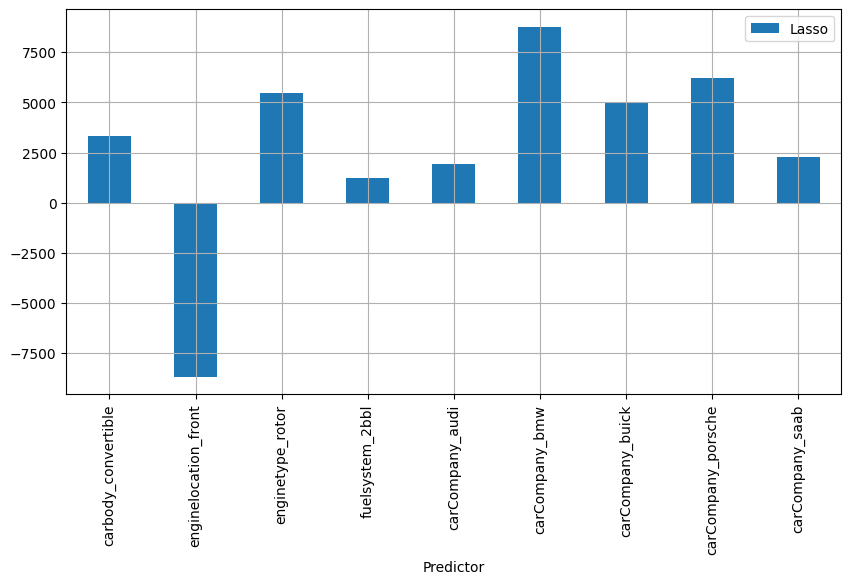

In [89]:
# Plot parameters with coefficients greater than 0
greater_0 = model_results[(model_results['Lasso'] > 1000 ) | (model_results['Lasso'] < -5000 )]
greater_0.plot(x = 'Predictor', kind = 'bar', figsize = (10,5))
plt.grid()